In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import random
from time import sleep
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Bidirectional
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
dirB='./Datasets/setB/'
tempB=[]
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)
dirE='./Datasets/setE/'
tempE=[]
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)

In [3]:
tempB

['./Datasets/setB/O001.txt',
 './Datasets/setB/O002.txt',
 './Datasets/setB/O003.txt',
 './Datasets/setB/O004.txt',
 './Datasets/setB/O005.txt',
 './Datasets/setB/O006.txt',
 './Datasets/setB/O007.txt',
 './Datasets/setB/O008.txt',
 './Datasets/setB/O009.txt',
 './Datasets/setB/O010.txt',
 './Datasets/setB/O011.txt',
 './Datasets/setB/O012.txt',
 './Datasets/setB/O013.txt',
 './Datasets/setB/O014.txt',
 './Datasets/setB/O015.txt',
 './Datasets/setB/O016.txt',
 './Datasets/setB/O017.txt',
 './Datasets/setB/O018.txt',
 './Datasets/setB/O019.txt',
 './Datasets/setB/O020.txt',
 './Datasets/setB/O021.txt',
 './Datasets/setB/O022.txt',
 './Datasets/setB/O023.txt',
 './Datasets/setB/O024.txt',
 './Datasets/setB/O025.txt',
 './Datasets/setB/O026.txt',
 './Datasets/setB/O027.txt',
 './Datasets/setB/O028.txt',
 './Datasets/setB/O029.txt',
 './Datasets/setB/O030.txt',
 './Datasets/setB/O031.txt',
 './Datasets/setB/O032.txt',
 './Datasets/setB/O033.txt',
 './Datasets/setB/O034.txt',
 './Datasets/s

In [4]:
tempE

['./Datasets/setE/S001.txt',
 './Datasets/setE/S002.txt',
 './Datasets/setE/S003.txt',
 './Datasets/setE/S004.txt',
 './Datasets/setE/S005.txt',
 './Datasets/setE/S006.txt',
 './Datasets/setE/S007.txt',
 './Datasets/setE/S008.txt',
 './Datasets/setE/S009.txt',
 './Datasets/setE/S010.txt',
 './Datasets/setE/S011.txt',
 './Datasets/setE/S012.txt',
 './Datasets/setE/S013.txt',
 './Datasets/setE/S014.txt',
 './Datasets/setE/S015.txt',
 './Datasets/setE/S016.txt',
 './Datasets/setE/S017.txt',
 './Datasets/setE/S018.txt',
 './Datasets/setE/S019.txt',
 './Datasets/setE/S020.txt',
 './Datasets/setE/S021.txt',
 './Datasets/setE/S022.txt',
 './Datasets/setE/S023.txt',
 './Datasets/setE/S024.txt',
 './Datasets/setE/S025.txt',
 './Datasets/setE/S026.txt',
 './Datasets/setE/S027.txt',
 './Datasets/setE/S028.txt',
 './Datasets/setE/S029.txt',
 './Datasets/setE/S030.txt',
 './Datasets/setE/S031.txt',
 './Datasets/setE/S032.txt',
 './Datasets/setE/S033.txt',
 './Datasets/setE/S034.txt',
 './Datasets/s

In [5]:
tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_table(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [6]:
tb

[      A0
 0    -24
 1    -22
 2    -17
 3    -18
 4    -19
 ...   ..
 4092  21
 4093  23
 4094  22
 4095   9
 4096 -74
 
 [4097 rows x 1 columns],
       A1
 0    -55
 1    -48
 2    -48
 3    -38
 4    -23
 ...   ..
 4092 -93
 4093 -95
 4094 -84
 4095 -60
 4096  40
 
 [4097 rows x 1 columns],
       A2
 0    -36
 1    -40
 2    -36
 3    -35
 4    -22
 ...   ..
 4092  70
 4093  49
 4094  37
 4095  20
 4096 -39
 
 [4097 rows x 1 columns],
        A3
 0     -14
 1      -5
 2       0
 3       7
 4       7
 ...   ...
 4092   98
 4093   86
 4094   76
 4095   57
 4096  119
 
 [4097 rows x 1 columns],
       A4
 0    -58
 1    -78
 2    -83
 3    -69
 4    -31
 ...   ..
 4092 -23
 4093 -36
 4094 -43
 4095 -44
 4096   9
 
 [4097 rows x 1 columns],
        A5
 0      87
 1      98
 2     103
 3     108
 4      97
 ...   ...
 4092   18
 4093   17
 4094   36
 4095   58
 4096  -24
 
 [4097 rows x 1 columns],
       A6
 0    -52
 1    -56
 2    -49
 3    -51
 4    -53
 ...   ..
 4092 -31
 4093 -3

In [7]:
te

[       A0
 0     100
 1     124
 2     153
 3     185
 4     210
 ...   ...
 4092    7
 4093   26
 4094   57
 4095   95
 4096  462
 
 [4097 rows x 1 columns],
        A1
 0     340
 1     353
 2     400
 3     470
 4     538
 ...   ...
 4092  829
 4093  722
 4094  512
 4095  130
 4096  196
 
 [4097 rows x 1 columns],
        A2
 0    -310
 1      93
 2     494
 3     789
 4     798
 ...   ...
 4092 -735
 4093 -847
 4094 -721
 4095 -491
 4096  910
 
 [4097 rows x 1 columns],
        A3
 0      84
 1      75
 2      21
 3     -68
 4    -138
 ...   ...
 4092 -234
 4093 -238
 4094 -209
 4095 -165
 4096 -212
 
 [4097 rows x 1 columns],
        A4
 0     343
 1     311
 2     284
 3     274
 4     260
 ...   ...
 4092  515
 4093  527
 4094  480
 4095  397
 4096  217
 
 [4097 rows x 1 columns],
        A5
 0     -88
 1    -115
 2    -140
 3    -159
 4    -164
 ...   ...
 4092  153
 4093  150
 4094  146
 4095  140
 4096  191
 
 [4097 rows x 1 columns],
        A6
 0     176
 1     186
 2     

In [8]:
def table(table):
    big_table=None
    for tf in table:
        big_table=pd.concat([big_table,tf],axis=1)
    return big_table

In [9]:
bigB=table(tb)
bigE=table(te)

head=list(bigB.columns.values)

In [10]:
len(bigB.columns)

100

In [11]:
bigB

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,-24,-55,-36,-14,-58,87,-52,2,8,-53,...,62,-128,-83,98,-53,29,-76,27,-6,-18
1,-22,-48,-40,-5,-78,98,-56,-6,0,-15,...,49,-158,-120,178,-33,10,-102,4,-19,-13
2,-17,-48,-36,0,-83,103,-49,-22,-16,11,...,14,-161,-123,236,-23,-26,-95,1,-47,0
3,-18,-38,-35,7,-69,108,-51,-17,-38,38,...,-14,-158,-119,237,0,-81,-65,19,-83,9
4,-19,-23,-22,7,-31,97,-53,6,-31,35,...,-14,-152,-93,187,10,-127,-30,43,-99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,21,-93,70,98,-23,18,-31,92,-108,-110,...,-33,-20,-3,-21,94,-90,-9,98,-55,91
4093,23,-95,49,86,-36,17,-33,76,-83,-118,...,-39,-45,-5,-10,80,-90,-24,77,-67,89
4094,22,-84,37,76,-43,36,-37,59,-45,-103,...,-34,-79,-27,0,53,-86,-34,65,-62,52
4095,9,-60,20,57,-44,58,-44,39,0,-77,...,-24,-95,-50,-12,39,-88,-32,47,-43,-4


In [12]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [13]:
matB=creat_mat(bigB)
matE=creat_mat(bigE)

In [14]:
matB=np.nan_to_num(matB)
matE=np.nan_to_num(matE)

In [15]:
matB.shape,matE.shape

((4097, 100), (4097, 100))

In [16]:
matB

array([[-24., -55., -36., ...,  27.,  -6., -18.],
       [-22., -48., -40., ...,   4., -19., -13.],
       [-17., -48., -36., ...,   1., -47.,   0.],
       ...,
       [ 22., -84.,  37., ...,  65., -62.,  52.],
       [  9., -60.,  20., ...,  47., -43.,  -4.],
       [-74.,  40., -39., ...,  36., -42., -56.]])

In [17]:
matE

array([[ 100.,  340., -310., ..., -438., -476.,   23.],
       [ 124.,  353.,   93., ..., -561., -518.,  144.],
       [ 153.,  400.,  494., ..., -622., -521.,  228.],
       ...,
       [  57.,  512., -721., ..., -118.,  246., -155.],
       [  95.,  130., -491., ..., -163.,  556.,    6.],
       [ 462.,  196.,  910., ...,  -56.,  276., -221.]])

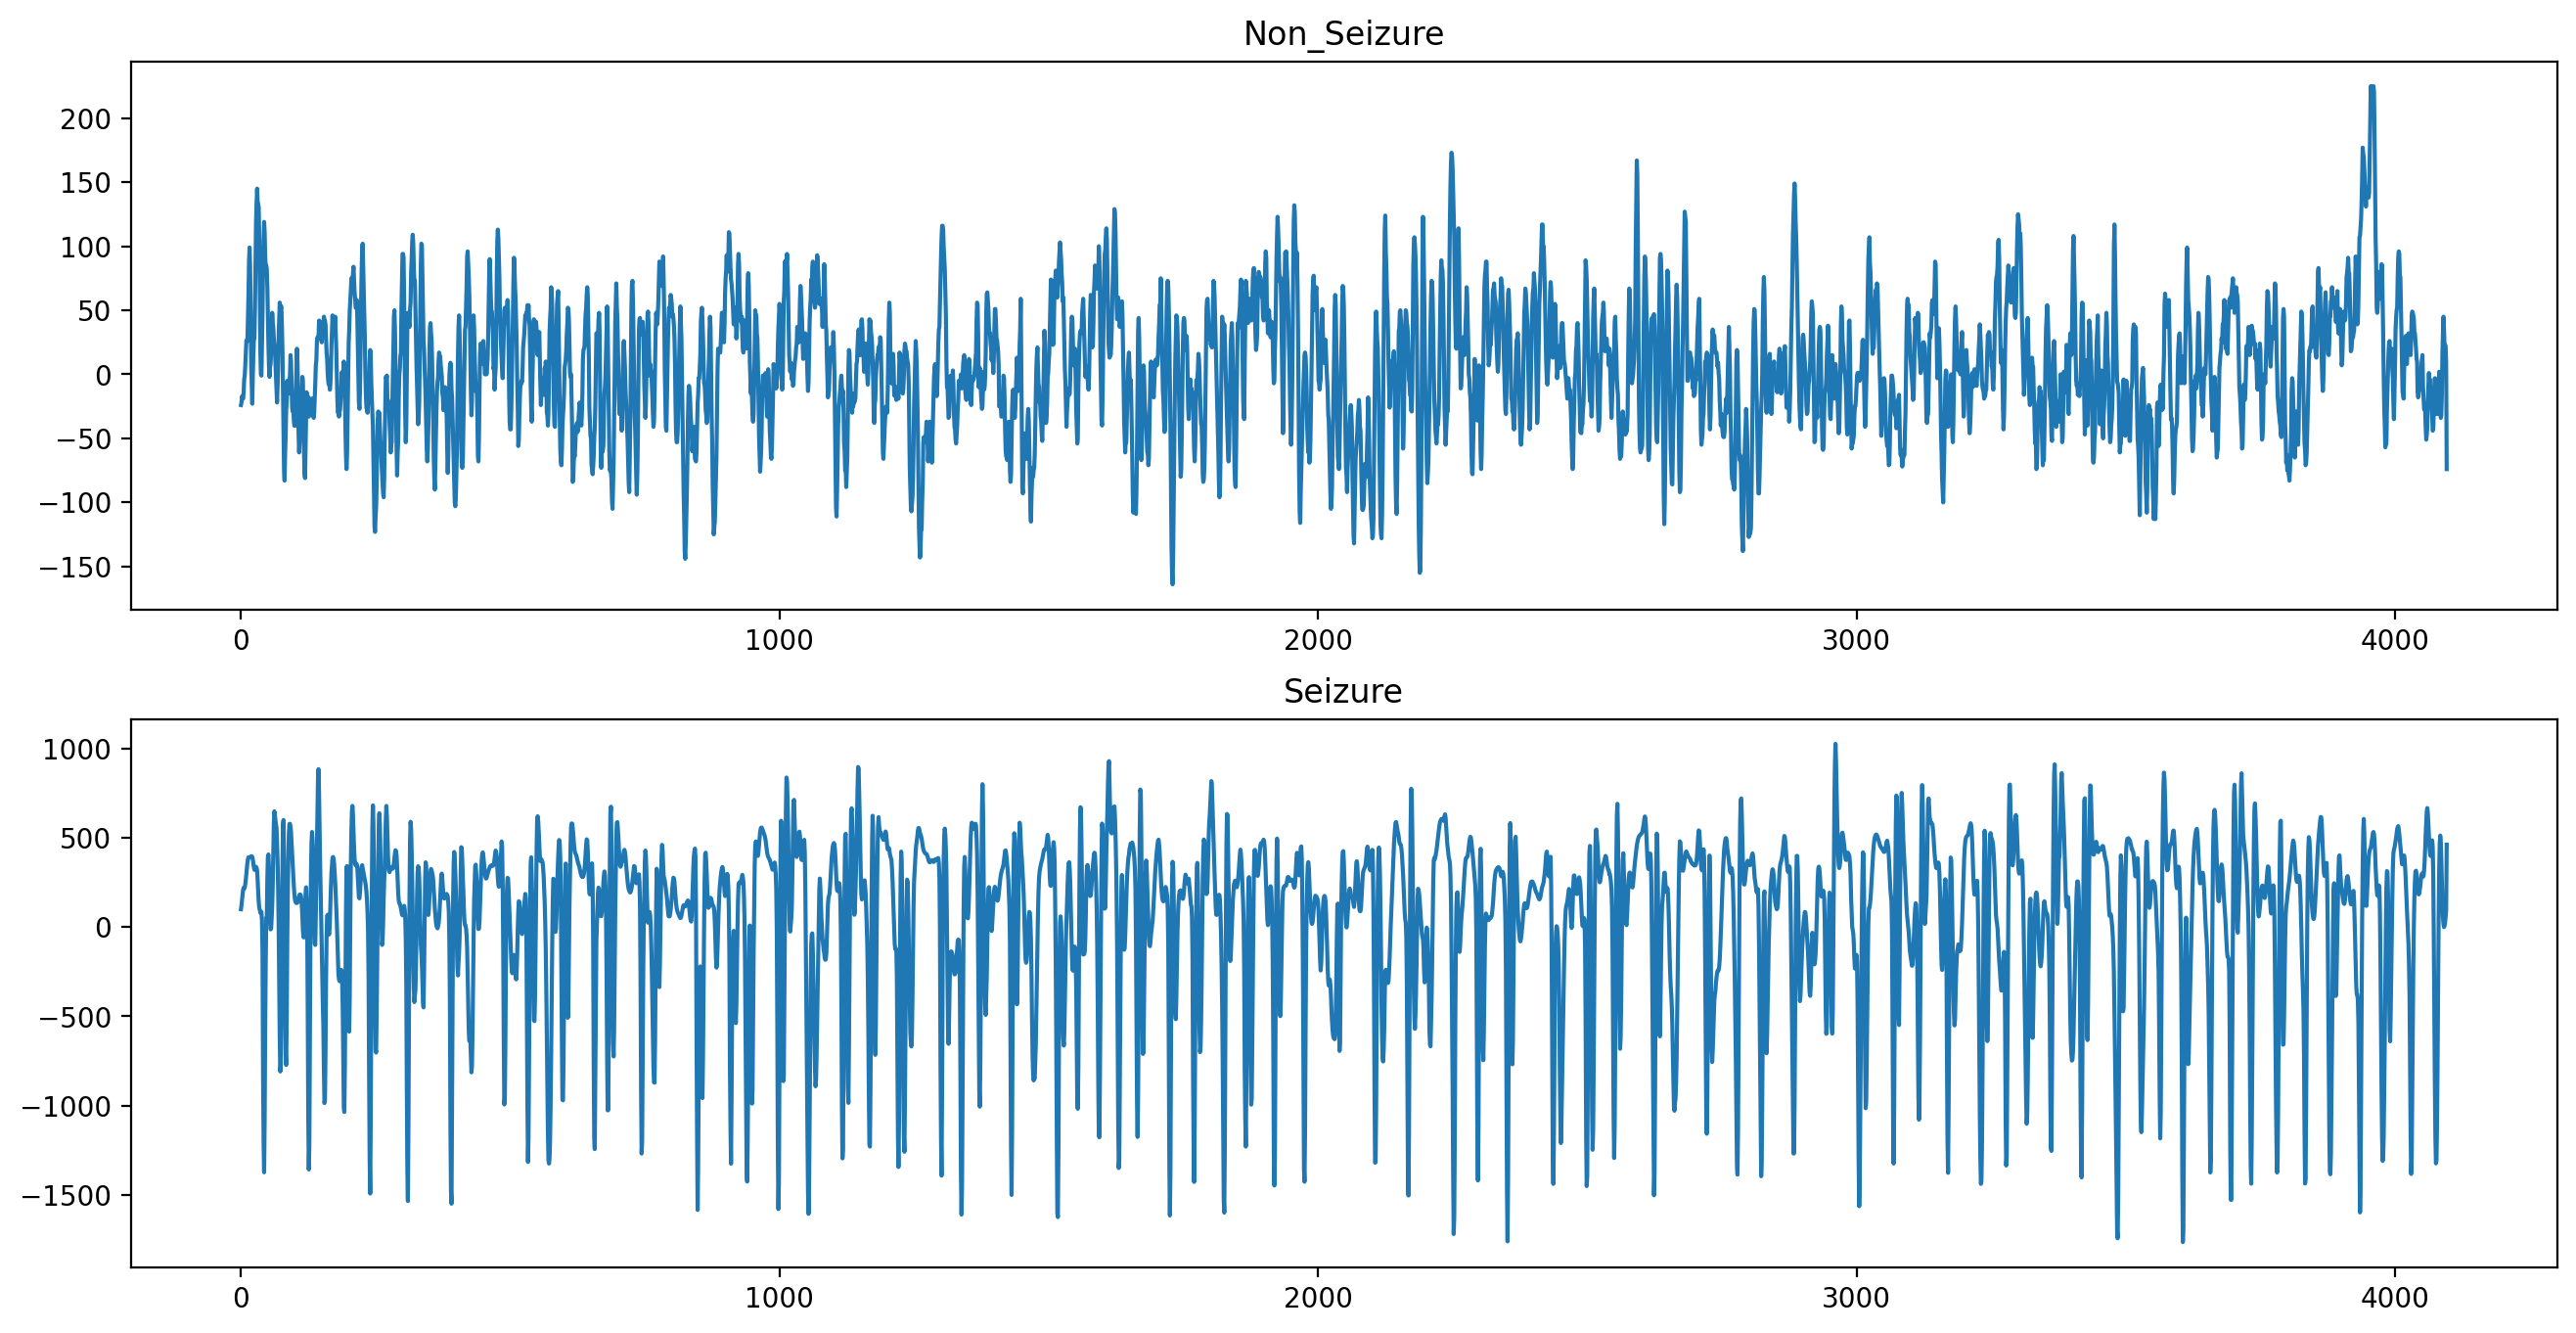

In [18]:
samples=np.arange(0,4097,1)
plt.figure(figsize=(16,8),dpi=200)
plt.subplot(2,1,1)
plt.title('Non_Seizure')
plt.plot(samples,matB[:,0],label='Non_Seizure')
plt.subplot(2,1,2)
plt.title('Seizure')
plt.plot(samples,matE[:,0],label='Seizure')
plt.show()

In [19]:
feature_size = 8
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [20]:
def features(mat):
  Fs   = 173
  fft = np.fft.fft(mat)
  mat = np.fft.ifft(fft[0:1500])
  mat = abs(np.fft.ifft(fft[0:1000]))
  lis = list()
  lis = lis + [np.max(abs(fft))]
  lis = lis + [np.min(abs(fft))]
  lis = lis + [np.mean(abs(fft))]
  lis = lis + [np.std(abs(fft))]
  lis = lis + [np.max(mat)]
  lis = lis + [np.min(mat)]
  lis = lis + [np.mean(mat)]
  lis = lis + [np.std(mat)]
  sleep(0.01)
             
  return lis

In [21]:
MftB = np.zeros((100,feature_size + 1))
for i in range(100):
    MftB[i,:] = features(matB[:,i]) + [1]

In [22]:
MftE = np.zeros((100,feature_size + 1))
for i in range(100):
    MftE[i,:] = features(matE[:,i]) + [0]

In [23]:
len(MftB),len(MftE)

(100, 100)

In [24]:
FCM_B = pd.DataFrame(MftB,columns=columns_name)
FCM_E = pd.DataFrame(MftE,columns=columns_name)

In [25]:
TotalDataset = pd.concat([FCM_B,FCM_E],ignore_index=True)

In [26]:
TotalDataset

,f1,f2,f3,f4,f5,f6,f7,f8,class
0,25949.454709,5.907827,1534.573278,2866.210888,526.454513,5.931969,129.343127,71.294761,1.0
1,34143.000000,4.459477,1408.411519,2762.615426,384.206542,1.701458,124.730955,68.443817,1.0
2,26556.252968,5.188324,1661.311389,3309.361641,581.219542,3.552666,146.977292,80.823932,1.0
3,36531.000000,6.264954,1870.503703,3759.104800,540.416633,5.622182,167.692428,92.849561,1.0
4,40030.079799,3.780446,1550.964860,3271.502408,486.830799,4.964520,142.266855,81.947939,1.0
...,...,...,...,...,...,...,...,...,...
195,182731.000000,4.140197,2964.034370,6900.671072,949.526909,7.628541,321.787517,169.284739,0.0
196,405933.567827,23.829796,12451.110052,33118.177387,3365.057684,584.042975,1497.708540,566.344367,0.0
197,206553.768555,13.807308,7000.972903,17431.403312,1554.877011,70.801519,785.302431,325.527149,0.0
198,186015.216714,22.248840,12069.225734,21179.101425,3292.508700,22.389188,897.583539,643.899324,0.0


In [27]:
x = TotalDataset[columns_name[:-1]]
y = TotalDataset[['class']]
x = np.asarray(x)
y = np.asarray(y)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [29]:
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train) 

In [30]:
x_test= st_x.transform(x_test)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 8)
(40, 8)
(160, 1)
(40, 1)


In [32]:
x_train=x_train.reshape(x_train.shape[0],8,1)
y_train=y_train.reshape(y_train.shape[0],1)
x_test=x_test.reshape(x_test.shape[0],8,1)
y_test=y_test.reshape(y_test.shape[0],1)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 8, 1)
(40, 8, 1)
(160, 1)
(40, 1)


In [34]:
batch_size=20
nb_epoch=100
hidden_size=64
use_dropout=True

model=Sequential()
model.add(LSTM(hidden_size,input_shape=(8,1)))

if use_dropout:
    model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

print(model.summary())

history=model.fit(x_train,y_train,validation_split=0,batch_size=batch_size,epochs=nb_epoch)
score=model.evaluate(x_test,y_test,batch_size=batch_size)
y_pred=model.predict(x_test).round()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
8/8 [==============================] - 2s 5ms/step - loss: 0.6257 - acc: 0.8188
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5342 - acc: 0.

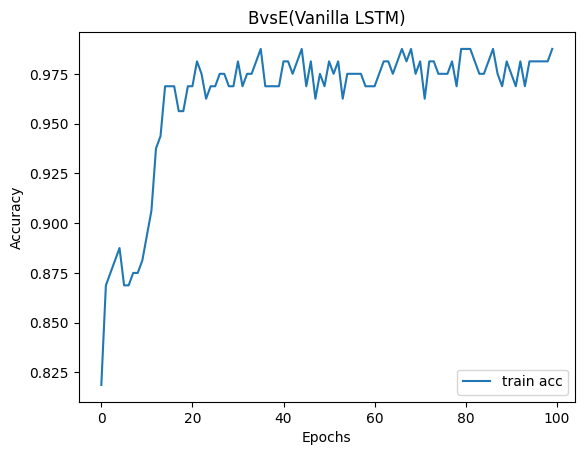

In [35]:
plt.plot(history.history['acc'])
plt.title('BvsE(Vanilla LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc','val acc'],loc='best')
plt.savefig('4-BvsE(Vanilla LSTM)_Accuracy.png')
plt.show()

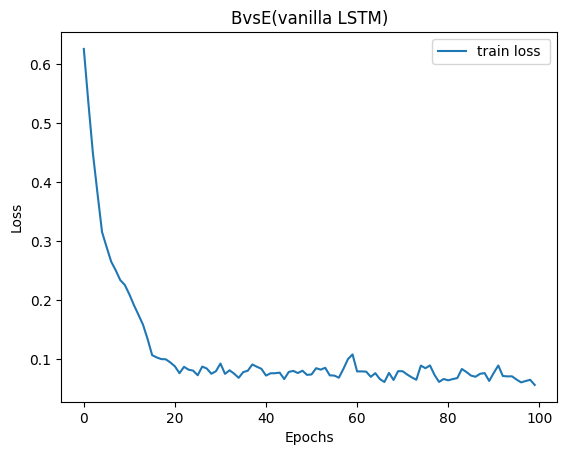

In [36]:
plt.plot(history.history['loss'])
plt.title('BvsE(vanilla LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train loss ','val loss'],loc='best')
plt.savefig('4-BvsE(Vanilla LSTM)_Loss.png')
plt.show()

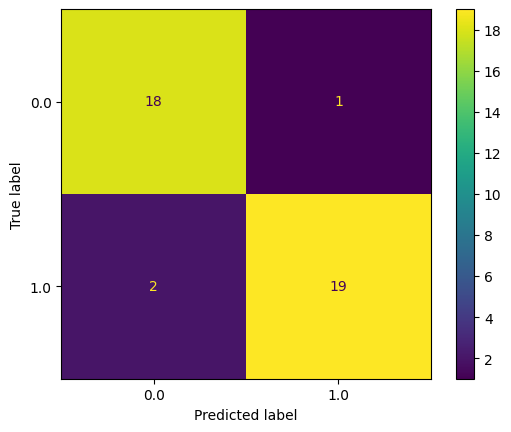

In [37]:
actual=y_test
predicted=y_pred
onfusion_matrix = metrics.confusion_matrix(actual, predicted)
ConfusionMatrixDisplay.from_predictions( y_test, y_pred)
plt.savefig('4-BvsE(Vanilla LSTM)_ConfusionMatrix.png')
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        19
         1.0       0.95      0.90      0.93        21

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40

